{'10110': 100}


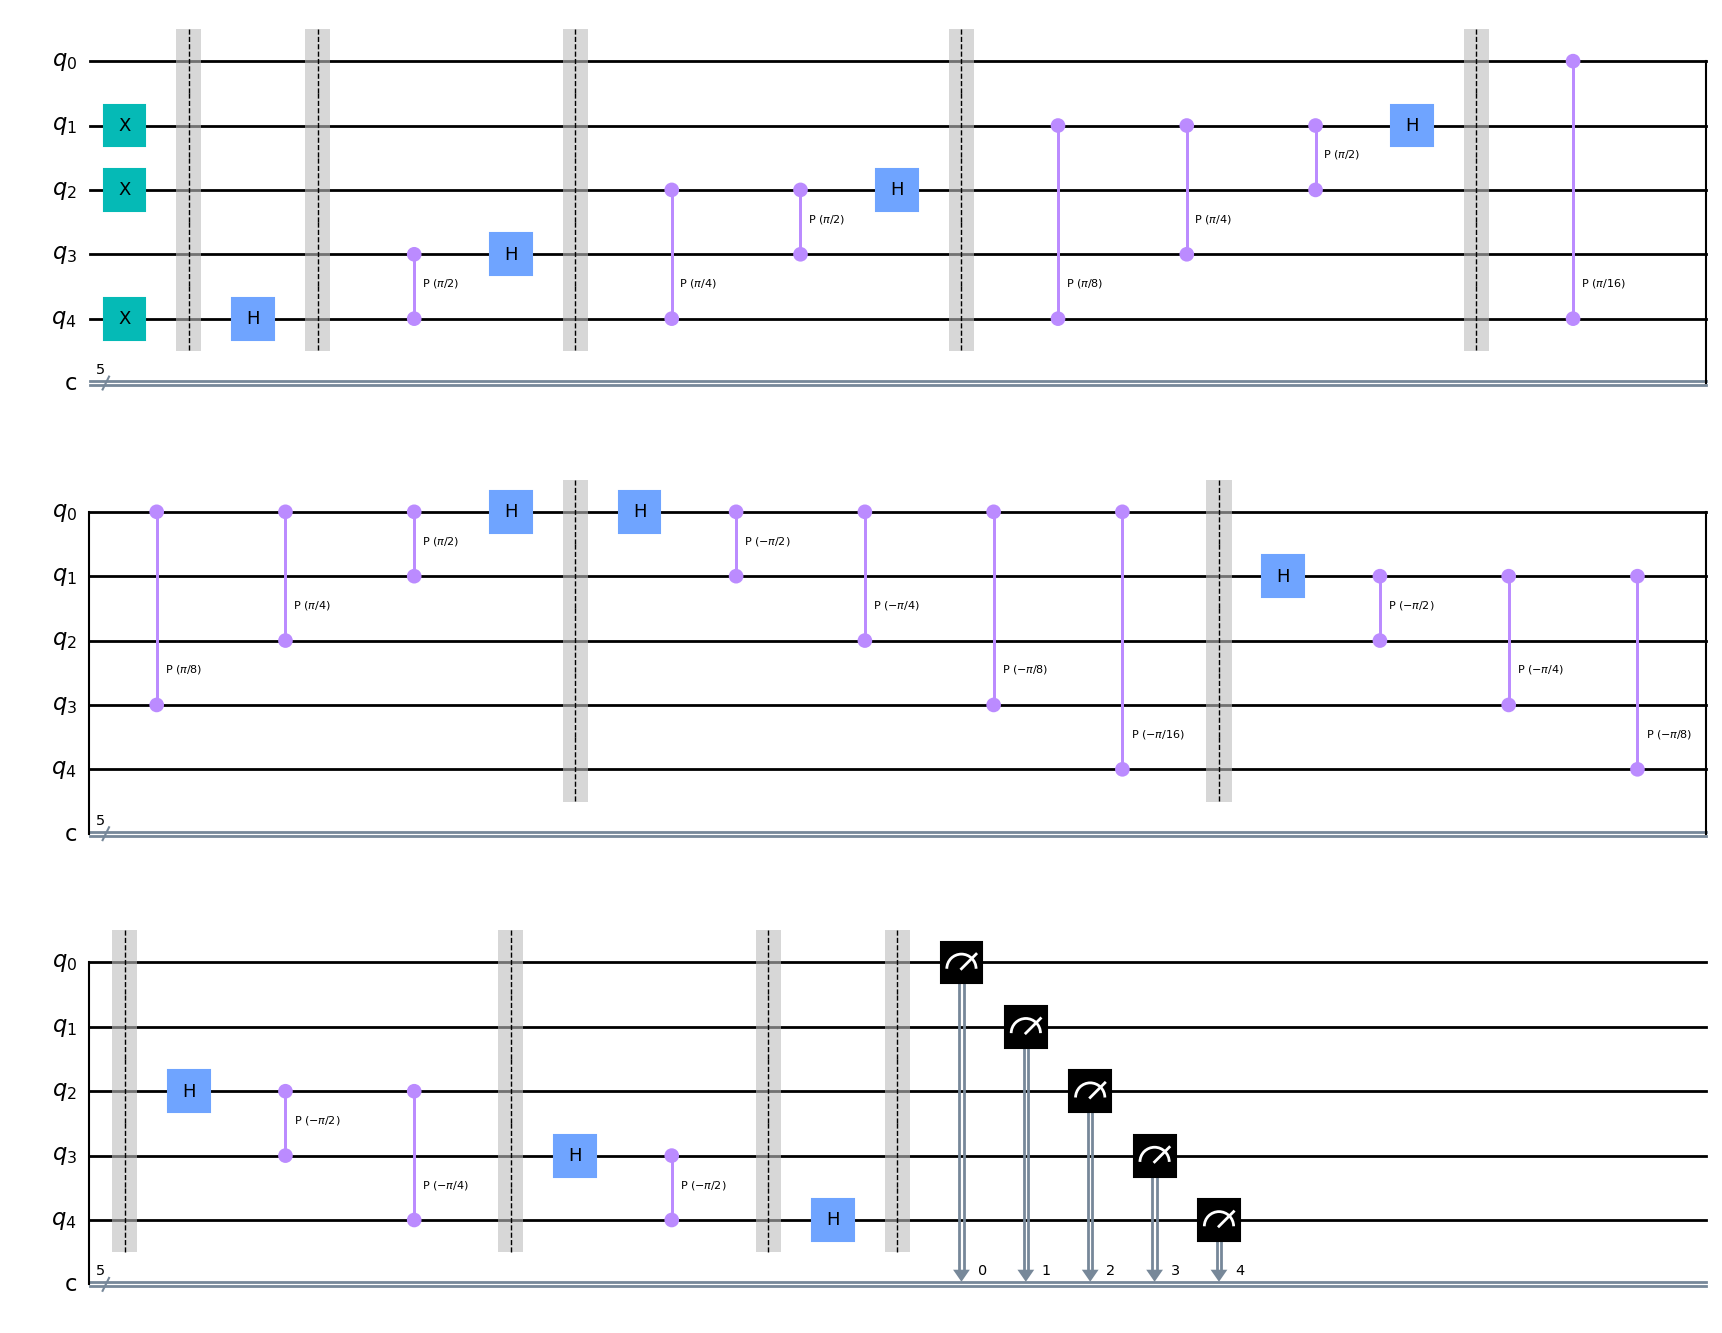

In [110]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from math import pi

n = '10110'
l = len(n)

qc = QuantumCircuit(l, l)

for i in range(l):
    if n[i] == "1":
        qc.x(l-(i+1))
qc.barrier()

for i in range(l-1, -1, -1):
    for j in range(l-1, i, -1):
        qc.cp(pi/2**(j-i), i, j)
    qc.h(i)
    qc.barrier()

for i in range(l):
    qc.h(i)
    for j in range(i+1, l):
        qc.cp(-pi/2**(j-i), i, j)
    qc.barrier()

qc.measure(range(l), range(l))
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=100).result()
counts = result.get_counts(compiled_circuit)

print(counts)

qc.draw('mpl')

Invalid input. Please choose again!
1 + 9 = 10


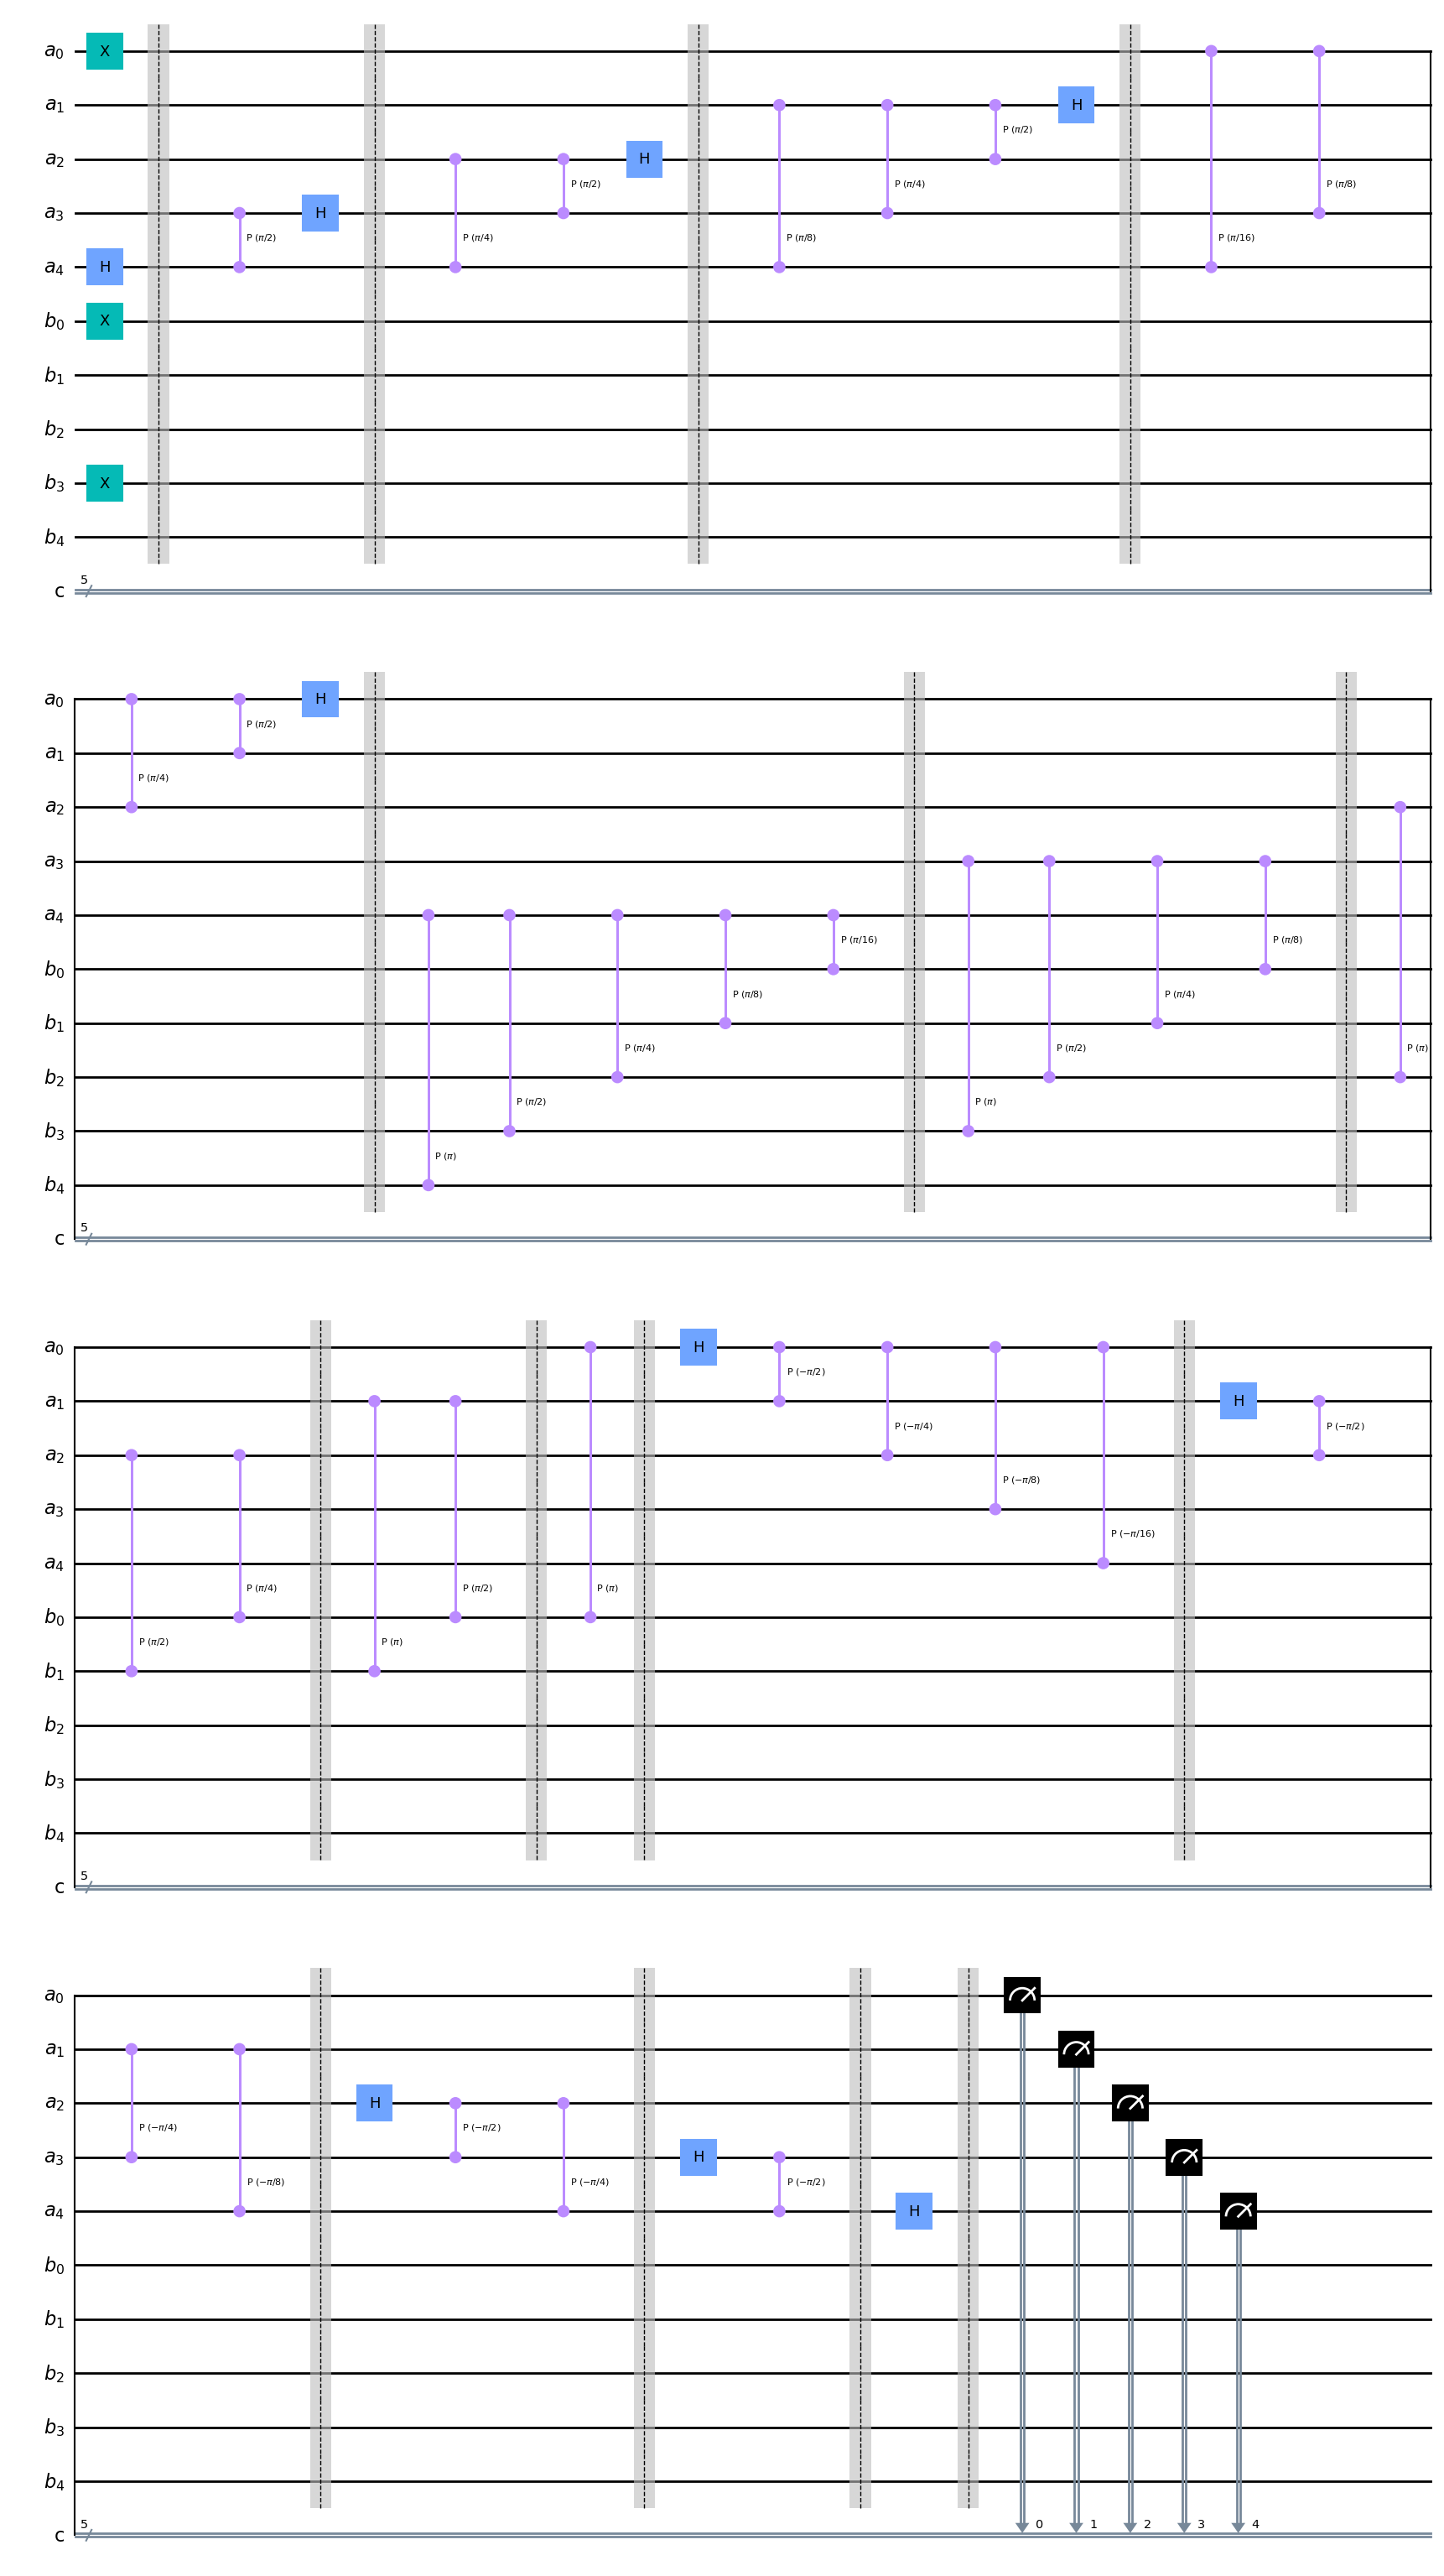

In [112]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from math import pi

simulator = AerSimulator()


def DQA(n1, n2, ln1, ln2, opr):
    a = QuantumRegister(ln1, 'a')
    b = QuantumRegister(ln2, 'b')
    c = ClassicalRegister(ln1, 'c')
    qc = QuantumCircuit(a, b, c)

    for i in range(ln1):
        if n1[i] == "1":
            qc.x(a[ln1-(i+1)])
    for i in range(ln2):
        if n2[i] == "1":
            qc.x(b[ln2-(i+1)])
    
    pie = pi    
    if opr == '-' : pie = -pi

    # qc.append(QFT(ln1, do_swaps=False), range(ln1))
    for i in range(ln1-1, -1, -1):
        for j in range(ln1-1, i, -1):
            qc.cp(pi/2**(j-i), i, j)
        qc.h(i)
        qc.barrier()

    for i in range(ln1-1, -1, -1) :
        for j in range(i+1) :
            qc.cp(pie/2**j, b[i-j], a[i])
        qc.barrier()

    # qc.append(QFT(ln1, do_swaps=False, inverse=True), range(ln1))
    for i in range(ln1):
        qc.h(i)
        for j in range(i+1, ln1):
            qc.cp(-pi/2**(j-i), i, j)
        qc.barrier()

    qc.measure(range(ln1), range(ln1))
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    for key in counts:
        output = key
    return output, qc


def inpt(opr) :
    while True:
        try:
            n1, n2 = [bin(int(input(f"Give number {i}: ")))[2:] for i in range(1, 3)]
            break
        except:
            print("Invalid input. Please try again!")
    
    swap = False
    
    if opr == '-' and int(n2, 2) > int(n1, 2) :
        n1, n2 = n2, n1
        swap = True

    d = abs(len(n2) - len(n1)) + 1
    if len(n1) <= len(n2) :
        n1, n2 = "0"*d + n1, '0' + n2
    elif len(n2) <= len(n1) :
        n2, n1 = "0"*d + n2, '0' + n1
    
    return n1, n2, swap


while True :
    opr = input('''What would you like to do?\n
    1) + for addition\n
    2) - for subtraction\n
    Choose (+ or -): ''')

    match opr:
        case '+' | '-' :
            n1, n2, swap = inpt(opr)
            result, qc = DQA(n1, n2, len(n1), len(n2), opr)
            sgn = ''
            if swap :
                n1, n2 = n2, n1
                sgn = '-'
            print(f"{int(n1, 2)} {opr} {int(n2, 2)} = {sgn}{int(result, 2)}")
            display(qc.draw('mpl'))
            break
        case _:
            print("Invalid input. Please choose again!")